<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_6_A_Streamlined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 6 includes stones 39 through 45 and primarily practices the CI outcome. For those reading the OER text, we are in [Chapter 8](https://openstax.org/books/introductory-statistics/pages/8-introduction). 

Code Block 1: Gathers data

Code Block 2: Chooses data 

Code Block 3: Builds a Confidence Interval 

Code Block 4: Uses a Formula to Build a Confidence Interval 

In [1]:
#### Code Block 1
gender = read.csv(url("https://gender-pay-gap.service.gov.uk/viewing/download-data/2019"))   #Try out different years
names(gender)
# Read about calculations: https://www.gov.uk/guidance/making-your-gender-pay-gap-calculations#overview 
backup = gender 

[1] "EmployerName"              "EmployerId"               
 [3] "Address"                   "PostCode"                 
 [5] "CompanyNumber"             "SicCodes"                 
 [7] "DiffMeanHourlyPercent"     "DiffMedianHourlyPercent"  
 [9] "DiffMeanBonusPercent"      "DiffMedianBonusPercent"   
[11] "MaleBonusPercent"          "FemaleBonusPercent"       
[13] "MaleLowerQuartile"         "FemaleLowerQuartile"      
[15] "MaleLowerMiddleQuartile"   "FemaleLowerMiddleQuartile"
[17] "MaleUpperMiddleQuartile"   "FemaleUpperMiddleQuartile"
[19] "MaleTopQuartile"           "FemaleTopQuartile"        
[21] "CompanyLinkToGPGInfo"      "ResponsiblePerson"        
[23] "EmployerSize"              "CurrentName"              
[25] "SubmittedAfterTheDeadline" "DueDate"                  
[27] "DateSubmitted"

In [2]:
#### Code Block 2 
# Pick a column. 
gender$column = gender$FemaleUpperMiddleQuartile 
length(gender$column)

[1] 6955

Sample size: 6955 observational units.
Original sample statistic is an average of 45.80523 units with a standard deviation of 25.73857 units.
With a confidence level of 95%, the actual population paramater is between 45.1999 and 46.40898.
With a confidence level of 95%, the actual population paramater is approximately 45.80444 with a marginof error of 0.6045359.


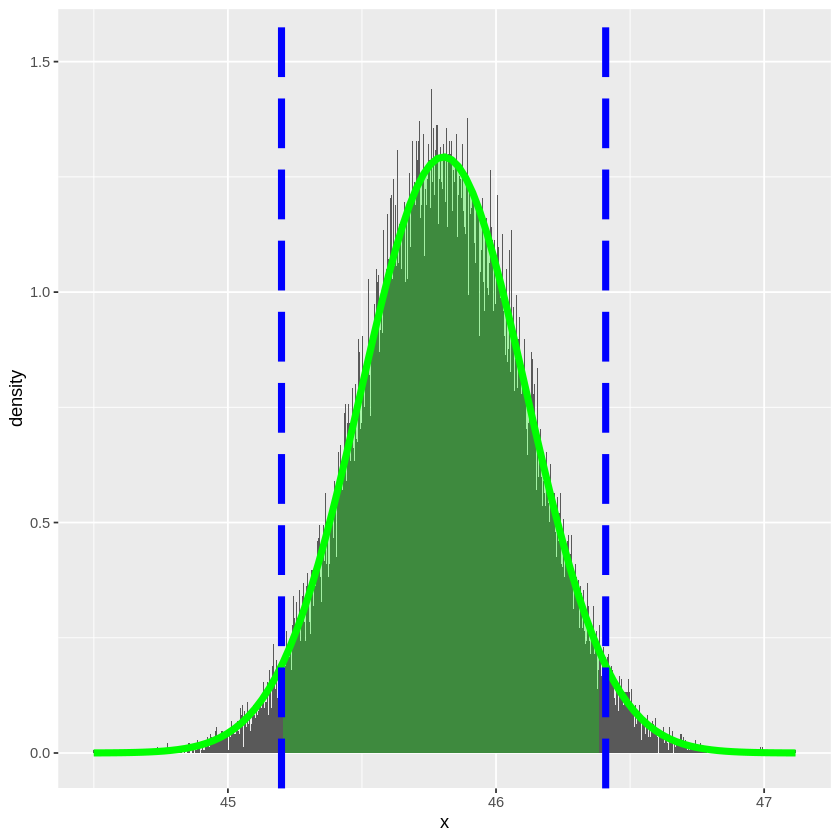

In [3]:
#### Code Block 3
# Confidence Interval code block
data<-0

data = gender$column 
z_conf=0.95 

## This part is automated.
alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)
size=length(data)
cat("Sample size:", size, "observational units.\n")
test <- 0
test_runs = 100000
for(i in 1:test_runs){
  test[i] = mean( sample(data,size,replace=TRUE))
  }
cat("Original sample statistic is an average of", mean(data),"units with a standard deviation of", sd(data), "units.\n")
Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

library(ggplot2)

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

width = (max(data)-min(data))/(10*length(data))

ggplot( Boot, aes(x)) + 
  geom_histogram(aes(y=..density..),binwidth=width) +   #change bindwidth to be nice.
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is between ", Boot_left, " and ", Boot_right, ".\n")

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is approximately ", Boot_mean, " with a margin", 
            "of error of ", zsc*Boot_sd, ".\n")            

In [4]:
data = gender$column 
z_conf=0.95 

ci = t.test(data, conf.level=z_conf)
me = (ci$conf.int[2] - ci$conf.int[1])/2 

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is between ", ci$conf.int[1], " and ", ci$conf.int[2], ".\n")

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population", 
            " paramater is approximately ", ci$estimate, " with a margin ", 
            "of error of ", me, ".\n") 

With a confidence level of 95%, the actual population paramater is between 45.20023 and 46.41024.
With a confidence level of 95%, the actual population paramater is approximately 45.80523 with a marginof error of 0.6050057.
